# Let's play with our model: making predictions

In [1]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import yaml

config = yaml.safe_load(open("project/config.yml", "r"))
training_config = config["training_config"]
model_name = training_config["model_name"]
num_labels = training_config["num_labels"]

config = AutoConfig.from_pretrained(model_name, num_labels=num_labels)
model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## On charge les poids

In [3]:
model = model.from_pretrained("project/results/checkpoint-1190", num_labels=num_labels)

## Essayons une prédiction sur deux phrases

In [29]:
dic = {0: "entailment", 1: "neutral", 2: "contradiction"}
#Exemple d'input

input1 = "A man eats a pizza."
input2 = "The man is sleeping"

In [30]:
from transformers import AutoTokenizer
import numpy as np
import torch

dic = {0: "entailment", 1: "neutral", 2: "contradiction"}

def prediction(input1, input2):
    #On tokénize avec nos inputs avec notre modèle
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    inputs = tokenizer(input1, input2, return_tensors="pt")
    outputs = model(**inputs)

    #On réalise la prédiction
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    label = np.argmax(predictions.detach().numpy())

    return dic[label]


print("C'est deux phrases sont en", prediction(input1, input2))

C'est deux phrases sont en contradiction


6


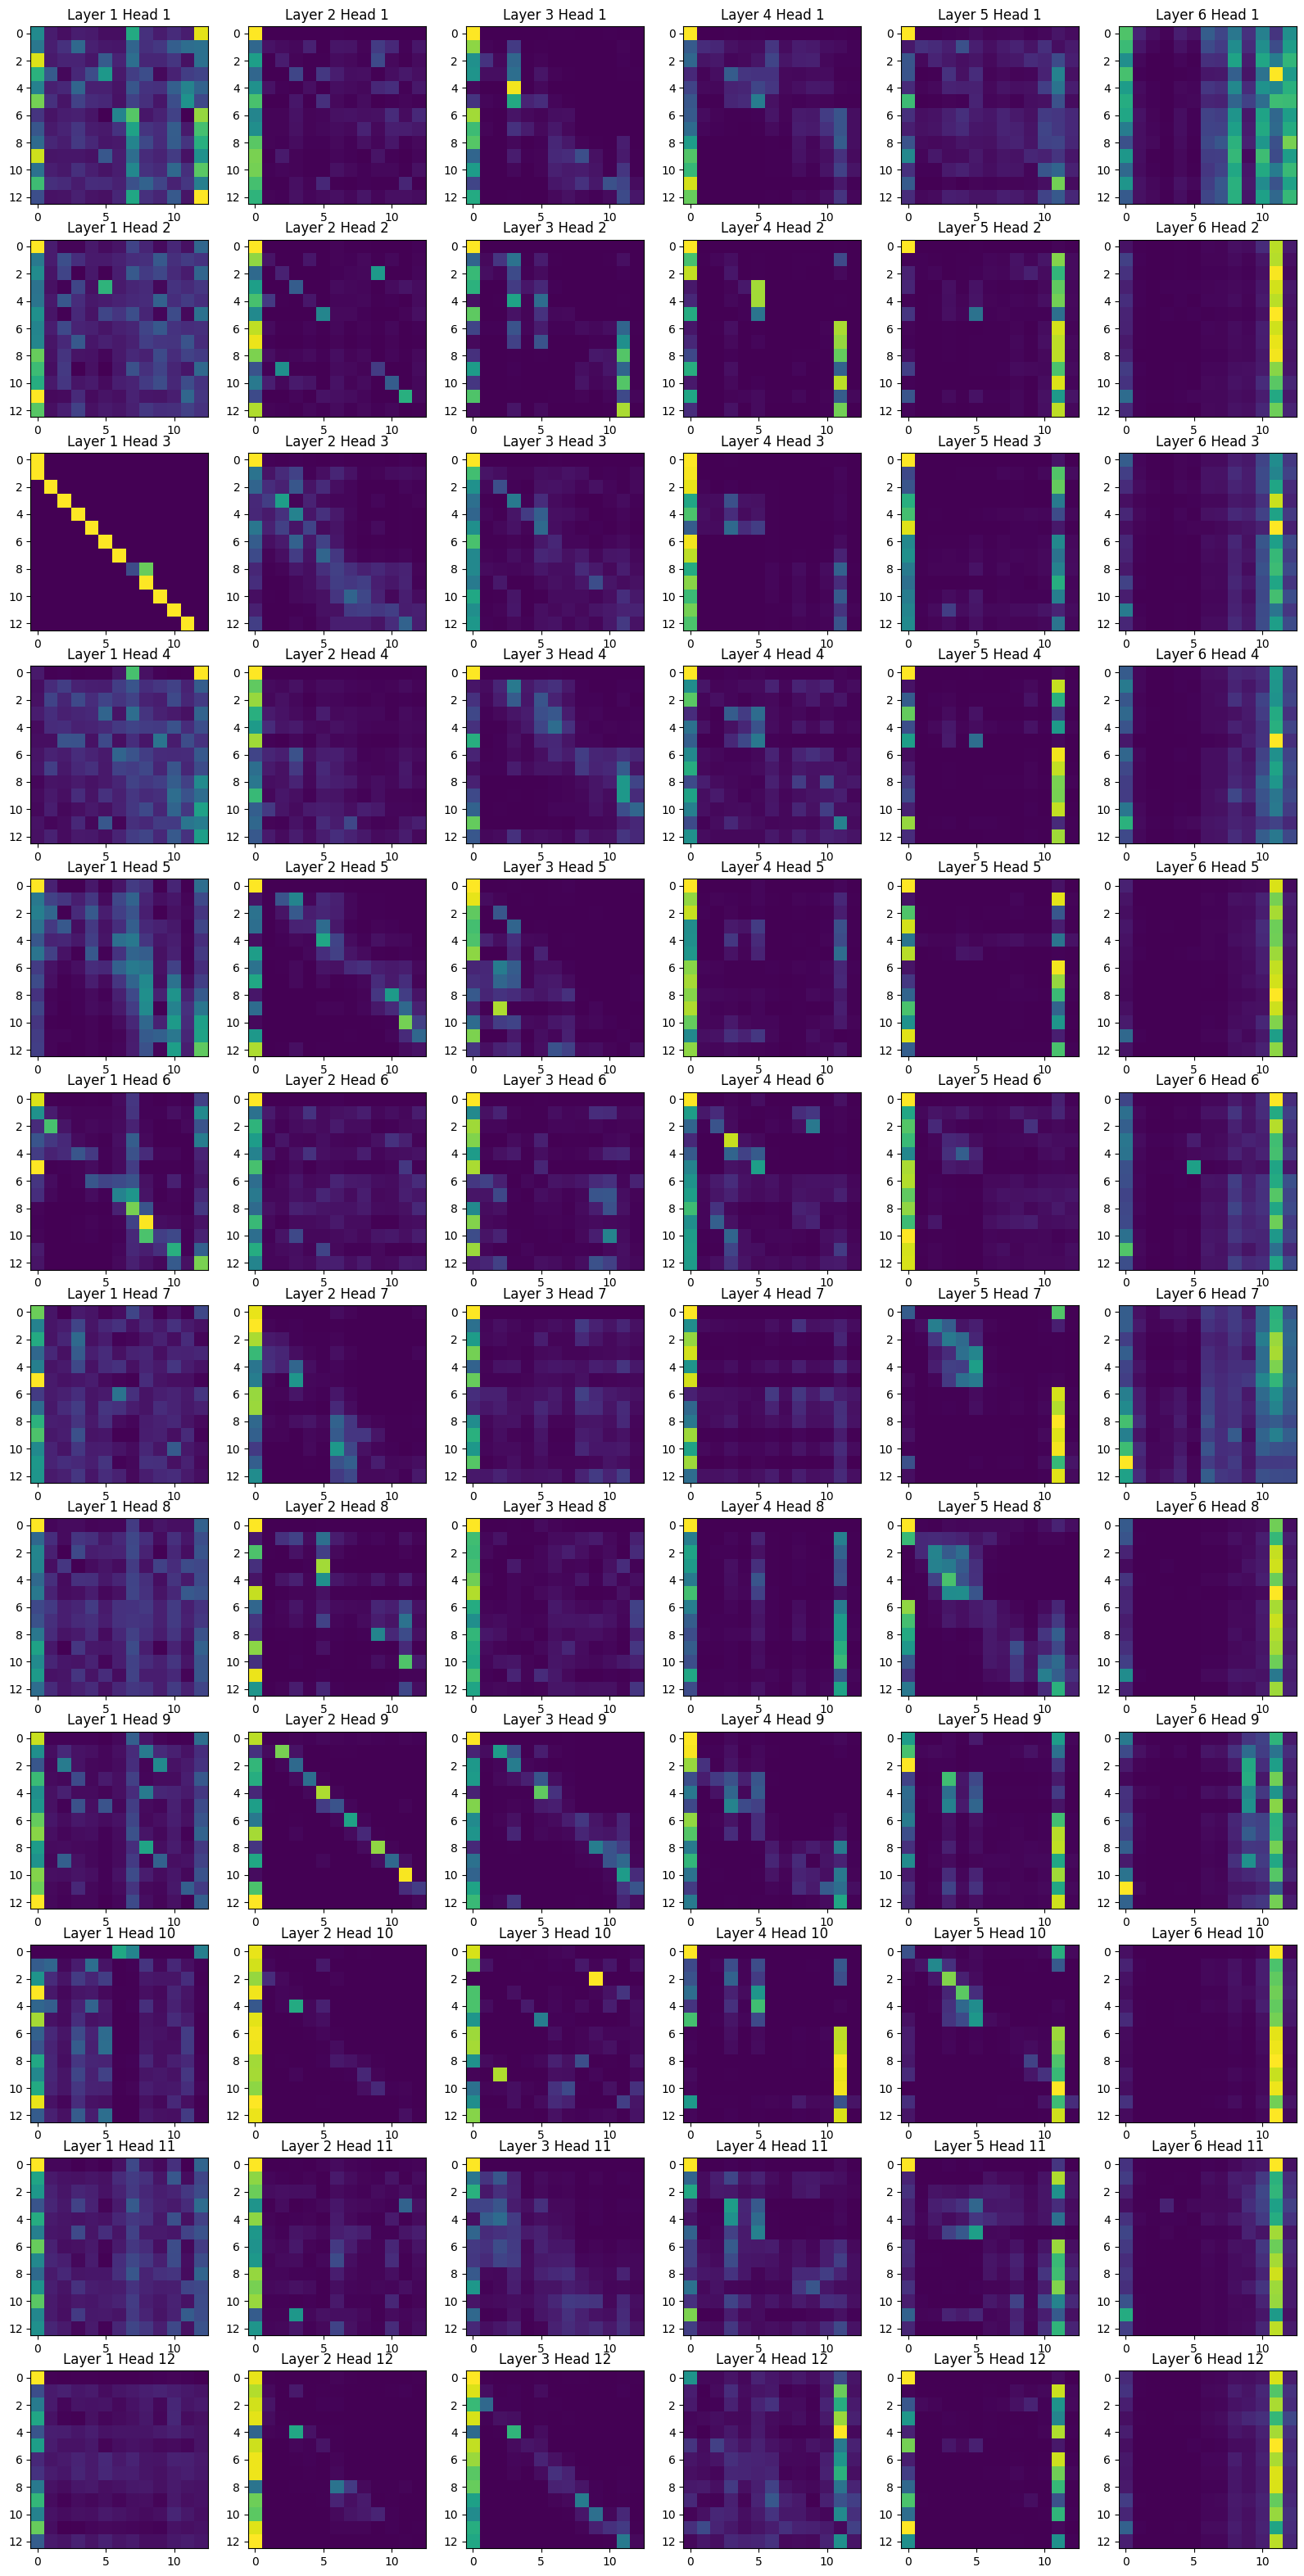

In [31]:
# visualize attention in the model
import matplotlib.pyplot as plt

def plot_attention(input1, input2):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    inputs = tokenizer(input1, input2, return_tensors="pt")
    outputs = model(**inputs, output_attentions=True)

    attentions = outputs.attentions
    attentions = [att.squeeze().detach().numpy() for att in attentions]

    fig, axs = plt.subplots(12, 6, figsize=(20, 40))
    print(len(attentions))
    for i, att in enumerate(attentions):
        for j, att2 in enumerate(att):
            axs[j,i].imshow(att2)
            axs[j,i].set_title(f"Layer {i+1} Head {j+1}")
    plt.show()
plot_attention(input1, input2)